## Cat-Image-Classification Using Deep Learning

<font color="blue"> This Project is to classify the Image of Cat using Deep Learning in depth of Logistic Regression by <b>Nithish_Raja</b>

* Build a logistic regression classifier to recognize  cats. This Project will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## Overview of Problem ##


**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).
    
* Build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

### 1. Package (Importing Session)

- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [33]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset 

%matplotlib inline

In [34]:
# Loading a Dataset 
# Here we importing the lr_utils.py function to call 
#the test and train data
x_train, y_train, x_test, y_test, classes = load_dataset()

**Example Image**

It is cat picture


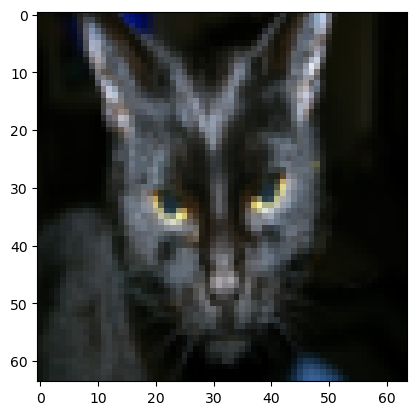

In [35]:
index = 25 #You can see other images while changing the index
plt.imshow(x_train[index])
print("It is", classes[np.squeeze(y_train[:,index])].decode("utf-8"), "picture")

**Calculating a training and testing Samples**

- Training Sample
- Testing Sample
- Height and Width of the Image
- Size of an Image
- Shape of Train data (Both x and y)
- Shape of Test data (Both x and y)

In [36]:
m_train = x_train.shape[0]
m_test = x_test.shape[0]
numpx = x_train[0].shape[0]

print(f"No. of Training Examples: {m_train}")
print(f"No. of Testing Examples: {m_test}")
print(f"Height and Width of the Image: {numpx}")
print(f"Size of an each image: ({numpx}, {numpx}, 3)")
print(f"Shape of the X_train: {x_train.shape}")
print(f"Shape of the Y_train: {y_train.shape}")
print(f"Shape ot the X_test: {x_test.shape}")
print(f"Shape of the Y_test: {y_test.shape}")

No. of Training Examples: 209
No. of Testing Examples: 50
Height and Width of the Image: 64
Size of an each image: (64, 64, 3)
Shape of the X_train: (209, 64, 64, 3)
Shape of the Y_train: (1, 209)
Shape ot the X_test: (50, 64, 64, 3)
Shape of the Y_test: (1, 50)


- Reshaping the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

* X.reshape(X.shape[0], -1).T

In [37]:
#train data reshaping
x_train_flatten = x_train.reshape(x_train.shape[0], -1).T

#test data reshaping
x_test_flatten = x_test.reshape(x_test.shape[0],-1).T

In [38]:
print(f"Flatten X_train: {x_train_flatten.shape}")
print(f"Flatten X_test: {x_test_flatten.shape}")

Flatten X_train: (12288, 209)
Flatten X_test: (12288, 50)


<font color="Blue">
To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.
<font color="red">
One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Standardizing the Dataset

In [39]:
train_x = x_train_flatten/255.
test_x = x_test_flatten/255.

## General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

* Build a Logistic Regression, using a Neural Network mindset.

**Building the parts of our algorithm:**

1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions.


**Step-1 Define teh model Structure**

In [40]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [41]:
print("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Step-2 Initializing the Parameters**

    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    

In [42]:
def initialize(dim):
    w = np.zeros([dim, 1])
    b = 0
    return w, b

In [43]:
dim = 2
w, b = initialize(dim)
print(f"w = {w}")
print(f"b = {b}")

w = [[0.]
 [0.]]
b = 0


**Forward and Backward Propagation**

Implement a function `propagate()` that computes the cost function and its gradient.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Backward Propagation:
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$


In [44]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    
    #forward propagation
    A = sigmoid(np.dot(w.T, X) + b) 
    #cost = -np.sum(Y*np.log(A) + (1-Y) *np.log(1-A))/m
    cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
    #Backward propagation
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m
    cost = np.squeeze(cost)
    grads = {"dw": dw, 
             "db": db}
    return grads, cost

In [45]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print("dw = ",grads["dw"])
print(f"db = {grads['db']}")
print(f"cost = {cost}")

dw =  [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


**Optimization**

- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

In [47]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)
        dw = grads['dw']
        db = grads['db']
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        #record the cost
        if i%100==0:
            costs.append(cost)
        if print_cost and i%100==0:
            print("Cost afer iteration %i: %f" %(i, cost))
    params = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
    return params, grads, costs

In [48]:
params,grads,costs = optimize(w,b,X,Y,num_iterations=100, 
                              learning_rate=0.009, print_cost=False)
print(f"w = {params['w']}")
print(f"b = {params['b']}")
print(f"dw = {grads['dw']}")
print(f"db = {grads['db']}")

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


Use w and b to predict the labels for a dataset X. Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [49]:
def predict(w,b,X):
    m = X.shape[1]
    Y_pred = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    #sigmoid
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        Y_pred[0][i] = 1 if A[0][i]>0.5 else 0
        
    return Y_pred

In [50]:
print("Prediction = ", predict(w, b, X))

Prediction =  [[1. 1.]]


**Merge all functions into a model**

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [51]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, 
         learning_rate=0.5, print_cost=False):
    
    w,b = initialize(X_train.shape[0])
    parameters,grads,costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate, print_cost)
    w = parameters['w']
    b = parameters['b']
    
    y_test_pred = predict(w, b, X_test)
    y_train_pred = predict(w, b, X_train)
    
    print(f"Train Accuracy %{100-np.mean(np.abs(y_train_pred - Y_train))*100}")
    print(f"Test Accuracy %{100-np.mean(np.abs(y_test_pred - Y_test))*100}")
    
    d = {"costs" : costs,
         "Y_Train_prediction": y_train_pred,
         "Y_Test_prediciton": y_test_pred,
         "w" :w, "b" :b,
         "learning_rate":learning_rate,
         "num_iterations":num_iterations}
    
    return d

In [52]:
logistic_regression_model = model(train_x,y_train,test_x,y_test,num_iterations=2000,learning_rate=0.005,print_cost=True,)

Cost afer iteration 0: 0.693147
Cost afer iteration 100: 0.584508
Cost afer iteration 200: 0.466949
Cost afer iteration 300: 0.376007
Cost afer iteration 400: 0.331463
Cost afer iteration 500: 0.303273
Cost afer iteration 600: 0.279880
Cost afer iteration 700: 0.260042
Cost afer iteration 800: 0.242941
Cost afer iteration 900: 0.228004
Cost afer iteration 1000: 0.214820
Cost afer iteration 1100: 0.203078
Cost afer iteration 1200: 0.192544
Cost afer iteration 1300: 0.183033
Cost afer iteration 1400: 0.174399
Cost afer iteration 1500: 0.166521
Cost afer iteration 1600: 0.159305
Cost afer iteration 1700: 0.152667
Cost afer iteration 1800: 0.146542
Cost afer iteration 1900: 0.140872
Train Accuracy %99.04306220095694
Test Accuracy %70.0


**Plotting a Learning Rate**

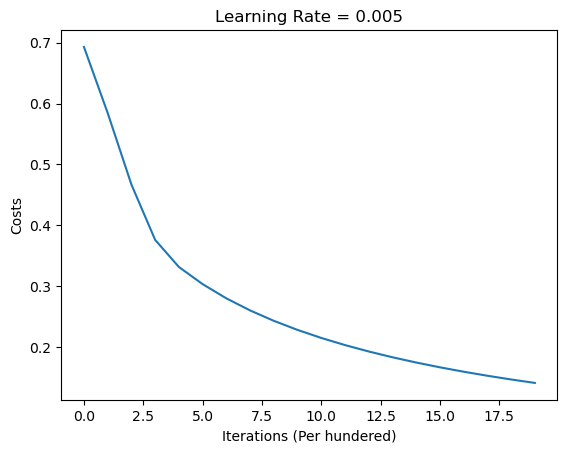

In [53]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel("Costs")
plt.xlabel("Iterations (Per hundered)")
plt.title(f"Learning Rate = {logistic_regression_model['learning_rate']}")
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

# Implementing Our own Image

It is "cat" image


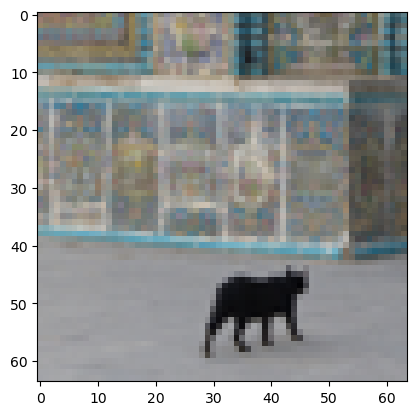

In [54]:
image = "images/cat_in_iran.jpg"

# pre_processing the image to fit in our Algorithm
#resizing the image
resized_image = np.array(Image.open(image).resize((numpx, numpx)))
plt.imshow(resized_image)
resized_image = resized_image/255.
resized_image = resized_image.reshape((1, numpx*numpx*3)).T
prediction_of_img = predict(logistic_regression_model['w'],
                           logistic_regression_model['b'], resized_image)

print(f"It is \"{classes[int(prediction_of_img)].decode('utf-8')}\" image")

**Points to Remember**

1. Preprocessing the dataset is important.
2. Implementing each function separately: initialize(), propagate(), optimize(). Then built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm.

**Code by** <font color="Red"> <b>Nithish_Raja</b>